In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append('..')

import modules.mean_shift as ms
import modules.plotting as pl
import modules.math_funcs as mf
import modules.general as gen
import modules.signals as sig

In [2]:
%matplotlib inline

In [3]:
directory = os.path.join('..', 'data', 'pickles')

file_name = '2014-12-16_P005_Pre_002_df_pass.pkl'
file_path = os.path.join(directory, file_name)

df_pass = pd.read_pickle(file_path)
frames = df_pass.index

In [4]:
foot_dist = (df_pass.L_FOOT - df_pass.R_FOOT).apply(norm)

In [5]:
frames = foot_dist.index.values

In [6]:
masses = 1 - mf.normalize_array(foot_dist.values)

labels, centroids, k = ms.cluster(frames.reshape(-1, 1), masses=masses, kernel='gaussian', radius=5)

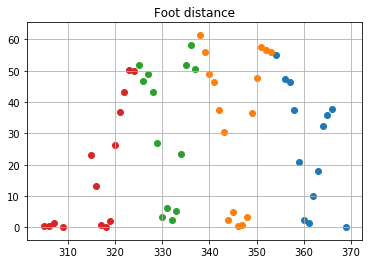

In [7]:
foot_dist_points = foot_dist.reset_index().values

plt.figure()
pl.scatter_labels(foot_dist_points, labels)
plt.title('Foot distance')
plt.grid()
plt.show()

In [8]:
frames = foot_dist.index.values

In [9]:
deriv = sig.window_derivative(foot_dist, 5)
deriv_2 = sig.window_derivative(deriv, 5)

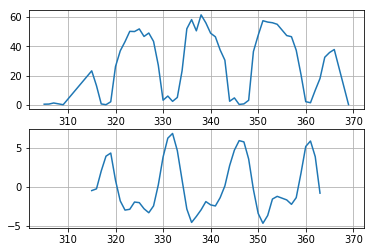

In [10]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

ax1.plot(foot_dist)
ax1.grid()

ax2.plot(deriv_2)
ax2.grid()

plt.show()

In [11]:
deriv_2 = deriv_2.dropna()

masses = mf.normalize_array(deriv_2.values)

peak_frames, mid_frames = sig.mean_shift_peaks(deriv_2, masses=masses, kernel='gaussian', radius=3)

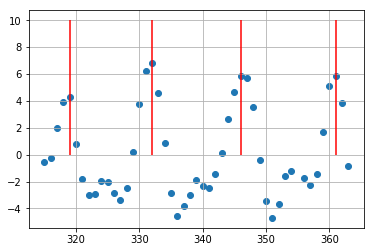

In [12]:
pl.scatter_series(deriv_2)
plt.vlines(x=peak_frames, ymin=0, ymax=10, color='r')
plt.grid()

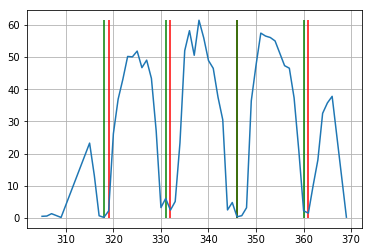

In [13]:
plt.plot(foot_dist)
plt.vlines(x=peak_frames, ymin=0, ymax=foot_dist.max(), color='r')
plt.vlines(x=mid_frames, ymin=0, ymax=foot_dist.max(), color='g')
plt.grid()